# Zadanie 1 - BFS i DFS

Exercise 1 Route searching

1.     Create a set of cities (as points) with coordinates x, y on a plane with height as z coordinate. The cost of going from city A to city B is equal to the Euclidean distance between two cities, if there exists a road. You should define scenarios according to two criteria:

There are all the direct connections / c.a. 80% of possible connections
The problem is symmetrical / asymmetrical (in asymmetrical – going up is height +10%, going down: -10%)
You should choose the coordinates randomly from the range <-100, 100> for x,y and <0, 50> for z.

2.     Represent the created map as a weighted (directed) graph, where cities are the nodes and roads are the edges of the graph.

3.     In the created scene, solve the traveling salesman problem: The salesman starts from a chosen city and has to visit every city exactly once before returning to the starting city. The goal is to find a path with the lowest cost.

In the problem, we define state as a partial or full path from the starting city and the corresponding state. You should represent the search problem in a form of state tree.

Implement a full search of the tree, using BFS and DFS methods.

In [1]:
import math
import numpy as np
import random
import string
import itertools
import time
import matplotlib.pyplot as plt

In [2]:
def points_generation(num_cities):
    points = [[random.randint(-100, 100), random.randint(-100, 100), random.randint(0, 50)] for i in range(0,num_cities)]
    return points

In [3]:
def calculate_cost(gen_points, symmetrical=True, all_connections=True):
    n = len(gen_points)
    mat = np.zeros((n,n))
    list_of_indices = []
    
    for i in range(n):
        for j in range(n):
            if i!=j:
                list_of_indices.append([i,j])
            
            if symmetrical == True:
                mat[i, j] = ((gen_points[i][0]-gen_points[j][0])**2+(gen_points[i][1]-gen_points[j][1])**2+(gen_points[i][2]-gen_points[j][2])**2)**(1/2)
            else:
                if gen_points[i][2]>gen_points[j][2]:
                    mat[i, j] = ((gen_points[i][0]-gen_points[j][0])**2+(gen_points[i][1]-gen_points[j][1])**2+0.9*(gen_points[i][2]-gen_points[j][2])**2)**(1/2)
                else:
                    mat[i, j] = ((gen_points[i][0]-gen_points[j][0])**2+(gen_points[i][1]-gen_points[j][1])**2+1.1*(gen_points[i][2]-gen_points[j][2])**2)**(1/2)

    if all_connections==False:
        num_connections = n*(n-1)
        to_del = math.floor(num_connections*0.2)
        indices = random.sample(list_of_indices, to_del)
        #-1 w macierzy oznacza brak połączenia
        for i in indices:
            mat[i[0], i[1]] = np.inf
        
    return mat

In [4]:
points = points_generation(5)
matrix_ex = calculate_cost(points, symmetrical=False, all_connections=False)

In [5]:
def bfs_algorithm(cost_matrix, starting_point=0):
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}

    starting_city = list_of_cities[starting_point]
    main_list = []
    new_list = list_of_cities.copy()
    new_list.remove(starting_city)
    main_list.append([starting_city, new_list, 0])

    while True:
        element = main_list[0]
        if len(element[1])==0:
            break

        for unvisited_city in element[1]:
            if cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]!=np.inf:
                list_unv = element[1].copy()
                list_unv.remove(unvisited_city)
                main_list.append([element[0]+unvisited_city, list_unv, element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]])
        main_list.pop(0)
    
    states = []
    
    for element in main_list:

        if cost_matrix[map_of_cities[element[0][-1]]][starting_point]!=np.inf:
            list_unv = element[1].copy()
            states.append([element[0]+list_of_cities[starting_point], element[2]+cost_matrix[map_of_cities[element[0][-1]]][starting_point]])
    
    min_val = np.inf
    min_arg = None
    
    for element in states:    
        if element[1] < min_val:
            min_val = element[1]
            min_arg = element[0]
            
    return [min_arg, min_val]
    

In [6]:
bfs_algorithm(matrix_ex)

['ACEDBA', 404.6793169641008]

In [7]:
bfs_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = bfs_algorithm(matrix)
    end = time.time()
    bfs_czas.append(end-start)

In [8]:
bfs_czas

[0.0,
 0.0009047985076904297,
 0.0,
 0.0008063316345214844,
 0.0,
 0.017049551010131836,
 0.6276905536651611]

In [9]:
def dfs_algorithm(cost_matrix, starting_point=0):
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    map_of_cities = dict(reversed(list(map_of_cities.items())))
    
    starting_city = list_of_cities[starting_point]
    main_list = []
    new_list = list_of_cities.copy()
    new_list.reverse()
    new_list.remove(starting_city)
    main_list.append([starting_city, new_list, 0])
    
    
    list_of_poss_sol = []
    
    while True:
        if len(main_list)==0:
            break
          
        element = main_list.pop()
        for unvisited_city in element[1]:
            if cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]!=np.inf:
                list_unv = element[1].copy()
                list_unv.remove(unvisited_city)
                if len(element[0])==n-1:
                    #print('dodawany element do poss_sol: ',[element[0]+unvisited_city, element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]])
                    list_of_poss_sol.append([element[0]+unvisited_city, element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]])
                else:
                    main_list.append([element[0]+unvisited_city, list_unv, element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]])
                #print(main_list)               
    
    states = []
    
    for element in list_of_poss_sol:
        if cost_matrix[map_of_cities[element[0][-1]]][starting_point]!=np.inf:
            states.append([element[0]+list_of_cities[starting_point], element[1]+cost_matrix[map_of_cities[element[0][-1]]][starting_point]])
    
    min_val = np.inf
    min_arg = None
    
    for element in states:    
        if element[1] < min_val:
            min_val = element[1]
            min_arg = element[0]
            
    return [min_arg, min_val]

In [10]:
dfs_algorithm(matrix_ex)

['ACEDBA', 404.6793169641008]

In [11]:
dfs_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = dfs_algorithm(matrix)
    end = time.time()
    dfs_czas.append(end-start)

In [12]:
dfs_czas

[0.0,
 0.0,
 0.0011014938354492188,
 0.0,
 0.002996683120727539,
 0.011462688446044922,
 0.16967105865478516]

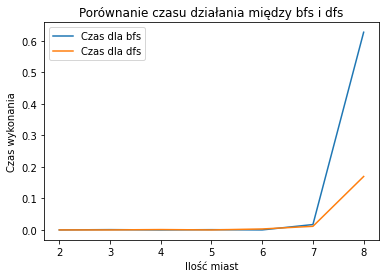

In [13]:
plt.plot(range(2,9), bfs_czas, label='Czas dla bfs')
plt.plot(range(2,9), dfs_czas, label='Czas dla dfs')
plt.legend()
plt.xlabel('Ilość miast')
plt.ylabel('Czas wykonania')
plt.title('Porównanie czasu działania między bfs i dfs')
plt.show()

# Zadanie 2 - Nearest Neighbor

Solve TSP using greedy algorithm with nearest neighbour as criterium and using another greedy algorithm of your choice. Use the structures from lab 1. Compare the results with full search (time, obtained cost)

In [14]:
def nearest_neighbour(cost_matrix, starting_point=0):
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    
    starting_city = list_of_cities[starting_point]
    main_list = [] # do zapisywania drogi
    
    new_list = list_of_cities.copy()
    new_list.remove(starting_city)
    main_list.append([starting_city, new_list, 0])
    
    while len(main_list[0][1])!=0:
        element = main_list.pop(0)
        for unvisited_city in element[1]:
            droga = element[0]+unvisited_city
            unvisited_city_list = element[1].copy()
            unvisited_city_list.remove(unvisited_city)
            if cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]==np.inf:
                continue
            koszt = element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]
            main_list.append([droga, unvisited_city_list, koszt])
        main_list.sort(key=lambda x: x[2])

        try:
            minimum = main_list[0]
        except:
            print('BRAK ROZWIĄZAŃ')
            return None
        
        main_list = [minimum]
    
    wynik = main_list[0]
    droga1 = wynik[0]+list_of_cities[starting_point]
    if cost_matrix[map_of_cities[wynik[0][-1]]][starting_point]==np.inf:
        print('brak rozwiązania')
        return None
    koszt = wynik[2]+cost_matrix[map_of_cities[wynik[0][-1]]][starting_point]
    return [droga1, koszt]

In [15]:
def two_nearest_neighbours(cost_matrix, starting_point=0):
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    
    starting_city = list_of_cities[starting_point]
    main_list = [] # do zapisywania drogi
    
    new_list = list_of_cities.copy()
    new_list.remove(starting_city)
    main_list.append([starting_city, new_list, 0])
    
    while True:
        tp = []
        if len(main_list[0][0])==n:
            break
        for option in main_list:
            for unvisited_city in option[1]:
                droga = option[0]+unvisited_city
                unvisited_city_list = option[1].copy()
                unvisited_city_list.remove(unvisited_city)

                koszt = option[2]+cost_matrix[map_of_cities[option[0][-1]]][map_of_cities[unvisited_city]]
                tp.append([droga, unvisited_city_list, koszt])
        
        tp.sort(key=lambda x: x[2])
        
        main_list = tp[0:2]
        
    main_list.sort(key=lambda x: x[2])
    wyniki = main_list[0:2]
    droga1 = wyniki[0][0]+list_of_cities[starting_point]
    droga2 = wyniki[1][0]+list_of_cities[starting_point]
    koszt1 = wyniki[0][2]+cost_matrix[map_of_cities[wyniki[0][0][-1]]][starting_point]
    koszt2 = wyniki[1][2]+cost_matrix[map_of_cities[wyniki[1][0][-1]]][starting_point]
    if koszt1 == np.inf and koszt2 == np.inf:
        print('Algorytm nie daje rozwiązania')
        return None
    if koszt1<koszt2:
        return [droga1, koszt1]

    else:
        return [droga2, koszt2]

In [16]:
points = points_generation(5)
matrix_ex = calculate_cost(points, symmetrical=False, all_connections=False)

In [17]:
nearest_neighbour(matrix_ex, 0)

brak rozwiązania


In [18]:
two_nearest_neighbours(matrix_ex, 0)

['AEBCDA', 443.1648936555885]

In [19]:
nn_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = nearest_neighbour(matrix)
    end = time.time()
    nn_czas.append(end-start)

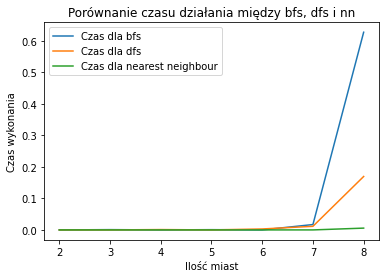

In [20]:
plt.plot(range(2,9), bfs_czas, label='Czas dla bfs')
plt.plot(range(2,9), dfs_czas, label='Czas dla dfs')
plt.plot(range(2,9), nn_czas, label='Czas dla nearest neighbour')
plt.legend()
plt.xlabel('Ilość miast')
plt.ylabel('Czas wykonania')
plt.title('Porównanie czasu działania między bfs, dfs i nn')
plt.show()

Algorytm najbliższego sąsiada jest znacznie szybszy niż bfs i dfs.

In [21]:
nnb_czas = []
for i in range(3,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = two_nearest_neighbours(matrix)
    end = time.time()
    nnb_czas.append(end-start)

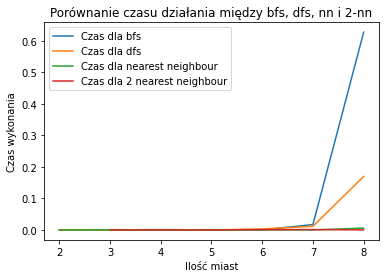

In [22]:
plt.plot(range(2,9), bfs_czas, label='Czas dla bfs')
plt.plot(range(2,9), dfs_czas, label='Czas dla dfs')
plt.plot(range(2,9), nn_czas, label='Czas dla nearest neighbour')
plt.plot(range(3,9), nnb_czas, label='Czas dla 2 nearest neighbour')
plt.legend()
plt.xlabel('Ilość miast')
plt.ylabel('Czas wykonania')
plt.title('Porównanie czasu działania między bfs, dfs, nn i 2-nn')
plt.show()

# Zadanie 3

## Algorytm A*

Solve/approximate TSP using A* with inadmissible/admissible heuristics. Use the structures from lab 1. Compare the results with full search and greedy algorithms (time, obtained cost)

In [23]:
def min_heuristic(cost_matrix, unvisited_cities):

    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    
    unv = [map_of_cities[i] for i in unvisited_cities]
    min_return = np.inf
    
    for i in unv:
        for j in unv:
            if i != j and cost_matrix[i][j] < min_return:
                min_return = cost_matrix[i][j]
        
    return min_return

In [24]:
def mean_heuristic(cost_matrix, unvisited_cities):

    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    unv = [map_of_cities[i] for i in unvisited_cities]
    
    cost = []
    
    for i in unv:
        for j in unv:
            if cost_matrix[i, j] != np.inf and i != j:
                cost.append(cost_matrix[i, j])
        
    return np.mean(cost)

In [25]:
def algorytm_A_gwiazdka(cost_matrix, heuristic='mean'):
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    
    main_list = [['A', list_of_cities.copy()[1:], 0, 0]]
    
    while True:
        element = main_list.pop(0)
        
        if element[1] == []:
            droga = element[0]+'A'
            koszt = element[2]+cost_matrix[map_of_cities[element[0][-1]]][0]
            main_list.append([droga, [], koszt, 0])
            
        else:
            for unvisited_city in element[1]:
                droga = element[0]+unvisited_city
                updated_unvisited_city = element[1].copy()
                updated_unvisited_city.remove(unvisited_city)
                koszt = element[2]+cost_matrix[map_of_cities[element[0][-1]]][map_of_cities[unvisited_city]]

                if heuristic == 'mean' and len(updated_unvisited_city)>1:
                    heurystyka = mean_heuristic(cost_matrix, updated_unvisited_city)*(n-len(droga)+1)
                elif heuristic == 'min' and len(updated_unvisited_city)>1:
                    heurystyka = min_heuristic(cost_matrix, updated_unvisited_city)*(n-len(droga)+1) 
                elif len(updated_unvisited_city)==1:
                    heurystyka = cost_matrix[map_of_cities[unvisited_city[0][-1]]][map_of_cities[updated_unvisited_city[0]]] + cost_matrix[map_of_cities[updated_unvisited_city[0]]][0]
                    
                elif len(updated_unvisited_city)==0:
                    heurystyka = cost_matrix[map_of_cities[unvisited_city[0][-1]]][0]
                   
                main_list.append([droga, updated_unvisited_city, koszt, heurystyka])
                
        main_list.sort(key=lambda x: x[2]+x[3])
        if len(main_list[0][0]) == n+1:
            result = main_list[0]
            return [result[0], result[2]]

In [26]:
points = points_generation(5)
matrix_ex = calculate_cost(points)

In [27]:
algorytm_A_gwiazdka(matrix_ex, heuristic='min')

['ACEBDA', 518.346056168942]

In [28]:
algorytm_A_gwiazdka(matrix_ex, heuristic='mean')

['ACEBDA', 518.346056168942]

In [29]:
amean_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = algorytm_A_gwiazdka(matrix, heuristic='mean')
    end = time.time()
    amean_czas.append(end-start)

In [55]:
amin_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = algorytm_A_gwiazdka(matrix, heuristic='min')
    end = time.time()
    amin_czas.append(end-start)

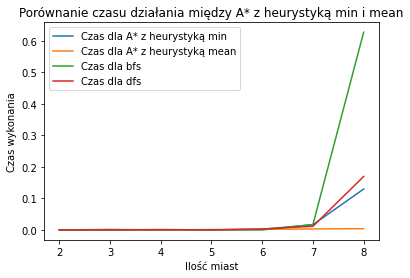

In [56]:
plt.plot(range(2,9), amin_czas, label='Czas dla A* z heurystyką min')
plt.plot(range(2,9), amean_czas, label='Czas dla A* z heurystyką mean')
plt.plot(range(2,9), bfs_czas, label='Czas dla bfs')
plt.plot(range(2,9), dfs_czas, label='Czas dla dfs')
plt.legend()
plt.xlabel('Ilość miast')
plt.ylabel('Czas wykonania')
plt.title('Porównanie czasu działania między A* z heurystyką min i mean')
plt.show()

# Zadanie 4 - Algorytm mrówkowy

Approximate the solution of TSP using ACO algorithm. Use the structures from lab 1. Compare the results with full search, greedy and A* algorithms (time, obtained cost)

In [32]:
def calculate_probability(ant, alfa, beta, tau, eta):
    
    '''
    wylicza prawdopodobieństwo przejścia dla mrówki z jej obecnego miejsca do następnych nieodwiedzonych na podstawie alfa, beta, tau i eta
    '''
    
    n = len(tau)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    prob = np.zeros(n)
    
    current_pos = ant[0][-1]
    num_current_pos = map_of_cities[current_pos]
    
    allowed = 0
    
    for element in list_of_cities:
        if element in ant[0]:
            continue
        p = (tau[num_current_pos, map_of_cities[element]])**alfa * (eta[num_current_pos, map_of_cities[element]])**beta
        prob[map_of_cities[element]] = p
        allowed = allowed + p
        
    return prob/allowed
        

In [33]:
def choosing_dependent_on_prob(probability):
    '''
    funkcja podejmująca decyzję, które miasto odwiedzi mrówka na podstawie prawdopodobieństw wybrania miasta
    
    ZWRACA NUMER MIASTA
    '''
    rand = random.uniform(0, 1)

    cummulative = [probability[0]]
    for i in range(1, len(probability)):
        cummulative.append(cummulative[i-1]+probability[i])

    for num in range(len(cummulative)):
        if rand<cummulative[num]:
            return num
    

In [34]:
def check_stagnation(list):
    'True - jeżeli wszystkie elementy są sobie równe, False w p.p.'
    return all(i == list[0] for i in list)

In [35]:
def Ant_System_Optimization(cost_matrix, ants_num=50, alfa=2, beta=2, Q=5, n_iter=500, evaporation_rate=0.5, c=0.2, variant='ant-cycle', starting_point_for_ants=0):
    eta = 1/cost_matrix
    eta[eta==np.inf] = 0
    
    n = len(cost_matrix)
    list_of_cities = list(string.ascii_uppercase[0:n])
    map_of_cities = {list_of_cities[i]: i for i in range(n)}
    
    starting_city = list_of_cities[starting_point_for_ants]

    
    t = 0
    delta_tau = np.zeros_like(cost_matrix)
    tau = np.full_like(cost_matrix, c)
    tau[cost_matrix==np.inf] = 0
    tau[cost_matrix==0] = 0
    
    #ants: [the tour, unvisited_cities, distance]
    
    solution_list = []
     
    while t<n_iter:
        t += 1
        #zerowanie pamięci mrówek
        ants = []
        for i in range(ants_num):
            temp = list_of_cities.copy()
            temp.remove(starting_city)
            ants.append([starting_city, temp, 0])

        for i in range(len(list_of_cities)-1):

            for num_mr in range(ants_num):
                curr_city = ants[num_mr][0][-1] #miasto w którym obecnie przebywa mrówka
                prob = calculate_probability(ants[num_mr], alfa, beta, tau, eta)
                citys_number = choosing_dependent_on_prob(prob)
                
                #jeżeli none, to mrówka nie może nigdzie dojść z danego miejsca
                if citys_number==None:
                    continue
                
                #tour update
                ants[num_mr][0] = ants[num_mr][0]+list_of_cities[citys_number]
                temp_list = ants[num_mr][1].copy()
                temp_list.remove(list_of_cities[citys_number])
                ants[num_mr][1] = temp_list
                ants[num_mr][2] = ants[num_mr][2]+cost_matrix[map_of_cities[curr_city]][citys_number]
                
                if variant=='ant-density':
                    delta_tau[map_of_cities[curr_city]][citys_number] = delta_tau[map_of_cities[curr_city]][citys_number] + Q
                elif variant=='ant-quantity':
                    delta_tau[map_of_cities[curr_city]][citys_number] = delta_tau[map_of_cities[curr_city]][citys_number] + Q/cost_matrix[map_of_cities[curr_city]][citys_number]

            if variant == 'ant-density' or variant == 'ant-quantity':
                    tau = evaporation_rate*tau+delta_tau
                    delta_tau = np.zeros_like(delta_tau)    
        
        #dojście z powrotem do miejsca startu
        for ant in ants:
            if len(ant[0])==n:
                curr_city = ant[0][-1]
                ant[0] = ant[0]+starting_city
                ant[2] = ant[2] + cost_matrix[map_of_cities[curr_city]][starting_point_for_ants]
                
                if variant=='ant-density':
                    delta_tau[map_of_cities[curr_city]][starting_point_for_ants] = delta_tau[map_of_cities[curr_city]][starting_point_for_ants] + Q
                elif variant=='ant-quantity':
                    delta_tau[map_of_cities[curr_city]][starting_point_for_ants] = delta_tau[map_of_cities[curr_city]][starting_point_for_ants] + Q/cost_matrix[map_of_cities[curr_city]][starting_point_for_ants]
        
        if variant=='ant-cycle':
            for ant in ants:
                #jeżeli mrówka nie doszła do końca trasy, to nie mamy jak uaktualinić
                if len(ant[0])==n+1:
                    #sprawdzanie połączeń
                    for i1 in range(n):
                        delta_tau[map_of_cities[ant[0][i1]]][map_of_cities[ant[0][i1+1]]] = delta_tau[map_of_cities[ant[0][i1]]][map_of_cities[ant[0][i1+1]]] + Q/ant[2]
                        
        #update tau
        tau = evaporation_rate*tau+delta_tau
        
        ants.sort(key=lambda x: (len(x[0]), -x[2]), reverse=True)
        if len(ants[0][0])==n+1:
            solution_list.append(ants[0])
            
        if check_stagnation(ants):
            break
    
    solution_list.sort(key=lambda x: x[2])
    
    return [solution_list[0][0], solution_list[0][2]]

In [36]:
points = points_generation(15)
matrix = calculate_cost(points, symmetrical=False, all_connections=False)

In [37]:
Ant_System_Optimization(matrix, variant='ant-density')

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AGCHFLKDOJENBMIA', 858.82609251582]

In [38]:
Ant_System_Optimization(matrix, variant='ant-density', alfa=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AIMBNEJODCGFHLKA', 818.8892779650494]

In [39]:
Ant_System_Optimization(matrix, variant='ant-density', beta=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AFGCHOJMILNBEDKA', 1225.6582964950128]

In [40]:
Ant_System_Optimization(matrix, variant='ant-density', evaporation_rate=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AHKLGCBNMIEJODFA', 990.1875864066193]

In [41]:
Ant_System_Optimization(matrix, variant='ant-quantity')

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AIMBNEJODHFCGLKA', 832.089749530351]

In [42]:
Ant_System_Optimization(matrix, variant='ant-quantity', alfa=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AIMBNEJODCGFHLKA', 818.8892779650494]

In [43]:
Ant_System_Optimization(matrix, variant='ant-quantity', beta=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AIMEJDOKNBHFCGLA', 1114.5862842792128]

In [44]:
Ant_System_Optimization(matrix, variant='ant-quantity', evaporation_rate=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AHFCGIMBNEOJDLKA', 912.8425460027402]

In [45]:
Ant_System_Optimization(matrix, variant='ant-cycle')

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AHFCGLKDOJENBMIA', 830.565621155106]

In [46]:
Ant_System_Optimization(matrix, variant='ant-cycle', alfa=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AIMBNEJODCGFHLKA', 818.8892779650494]

In [47]:
Ant_System_Optimization(matrix, variant='ant-cycle', beta=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AGMIBNJEDOHFLKCA', 1002.924405101626]

In [48]:
Ant_System_Optimization(matrix, variant='ant-cycle', evaporation_rate=0.1)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix
C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\4127733997.py:24: RuntimeWarning: invalid value encountered in divide
  return prob/allowed


['AHFCGLKDOJENBMIA', 830.565621155106]

In [49]:
ants_czas = []
for i in range(2,9):
    start = time.time()
    for j in range(5):
        points = points_generation(i)
        matrix = calculate_cost(points)
        droga = Ant_System_Optimization(matrix)
    end = time.time()
    ants_czas.append(end-start)

C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix


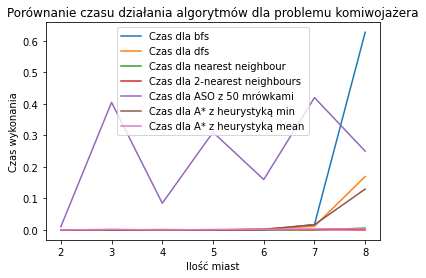

In [57]:
plt.plot(range(2,9), bfs_czas, label='Czas dla bfs')
plt.plot(range(2,9), dfs_czas, label='Czas dla dfs')
plt.plot(range(2,9), nn_czas, label='Czas dla nearest neighbour')
plt.plot(range(3,9), nnb_czas, label='Czas dla 2-nearest neighbours')
plt.plot(range(2,9), ants_czas, label='Czas dla ASO z 50 mrówkami')
plt.plot(range(2,9), amin_czas, label='Czas dla A* z heurystyką min')
plt.plot(range(2,9), amean_czas, label='Czas dla A* z heurystyką mean')
plt.legend()
plt.xlabel('Ilość miast')
plt.ylabel('Czas wykonania')
plt.title('Porównanie czasu działania algorytmów dla problemu komiwojażera')
plt.show()

In [65]:
import matplotlib.pyplot as plt

bfs = []
dfs = []
nn = []
nn2 = []
a_mean = []
a_min = []
aso_density = []
aso_quantity = []
aso_cycle=[]

for i in range(10):
    points = points_generation(7)
    matrix = calculate_cost(points)
    
    bfs.append(bfs_algorithm(matrix)[1])
    dfs.append(dfs_algorithm(matrix)[1])
    nn.append(nearest_neighbour(matrix)[1])
    nn2.append(two_nearest_neighbours(matrix)[1])
    a_mean.append(algorytm_A_gwiazdka(matrix, heuristic='mean')[1])
    a_min.append(algorytm_A_gwiazdka(matrix, heuristic='min')[1])
    aso_density.append(Ant_System_Optimization(matrix, variant='ant-density')[1])
    aso_quantity.append(Ant_System_Optimization(matrix, variant='ant-quantity')[1])
    aso_cycle.append(Ant_System_Optimization(matrix, variant='ant-cycle')[1])


C:\Users\Lidia\AppData\Local\Temp\ipykernel_11420\3246113240.py:2: RuntimeWarning: divide by zero encountered in divide
  eta = 1/cost_matrix


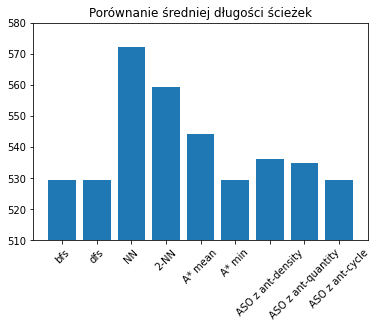

In [67]:
plt.bar(['bfs', 'dfs', 'NN', '2-NN', 'A* mean', 'A* min', 'ASO z ant-density', 'ASO z ant-quantity', 'ASO z ant-cycle'],
        [np.mean(bfs),  np.mean(dfs), np.mean(nn), np.mean(nn2), np.mean(a_mean), np.mean(a_min), np.mean(aso_density), np.mean(aso_quantity), np.mean(aso_cycle)])
plt.title('Porównanie średniej długości ścieżek')
plt.ylim(510, 580)
plt.xticks(rotation=45)
plt.show()